# Load datasets

In [2]:
import os
print(os.getcwd())


c:\Users\genhk\Desktop\JDA\Final_Project


In [3]:
import pandas as pd
jun = pd.read_csv(r'.\listings_jun2025.csv')
mar = pd.read_csv(r'.\listings_mar2025.csv')
dec = pd.read_csv(r'.\listings_dec2024.csv')

In [4]:
jun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25297 entries, 0 to 25296
Data columns (total 79 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            25297 non-null  int64  
 1   listing_url                                   25297 non-null  object 
 2   scrape_id                                     25297 non-null  int64  
 3   last_scraped                                  25297 non-null  object 
 4   source                                        25297 non-null  object 
 5   name                                          25297 non-null  object 
 6   description                                   24879 non-null  object 
 7   neighborhood_overview                         14048 non-null  object 
 8   picture_url                                   25297 non-null  object 
 9   host_id                                       25297 non-null 

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

# Cleaning

In [6]:
drop_cols=dec.columns[dec.isnull().sum()/dec.shape[0]>0.8]
dec.drop(drop_cols,axis=1,inplace=True)
print(dec.shape)

(21058, 73)


In [7]:
drop_cols=jun.columns[jun.isnull().sum()/jun.shape[0]>0.8]
jun.drop(drop_cols,axis=1,inplace=True)
print(jun.shape)

(25297, 77)


In [8]:
dec['price'] = dec['price'].replace('[$,]','',regex=True)
dec['price'] = dec['price'].astype(float)
dec['price'] = dec['price'].fillna(dec['price'].median())

In [9]:
jun['price'] = jun['price'].replace('[$,]','',regex=True)
jun['price'] = jun['price'].astype(float)
jun['price'] = jun['price'].fillna(jun['price'].median())

In [10]:
dec['host_response_rate']=dec['host_response_rate'].str.replace('%','')
dec['host_acceptance_rate']=dec['host_acceptance_rate'].str.replace('%','')
dec['host_response_rate']=dec['host_response_rate'].astype(float)
dec['host_acceptance_rate']=dec['host_acceptance_rate'].astype(float)

In [11]:
jun['host_response_rate']=jun['host_response_rate'].str.replace('%','')
jun['host_acceptance_rate']=jun['host_acceptance_rate'].str.replace('%','')
jun['host_response_rate']=jun['host_response_rate'].astype(float)
jun['host_acceptance_rate']=jun['host_acceptance_rate'].astype(float)

In [12]:
dec['host_response_time']=dec['host_response_time'].dropna()

In [13]:
jun['host_response_time']=jun['host_response_time'].dropna()

# Changes in number of listings

## Cleaning

In [14]:
jun_listings = jun[['neighbourhood_cleansed']]

In [15]:
jun_listings.isnull().sum()

neighbourhood_cleansed    0
dtype: int64

In [16]:
jun_listings['neighbourhood_cleansed'].nunique()

49

In [17]:
jun_listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Shinjuku Ku            4701
Sumida Ku              3556
Taito Ku               2646
Toshima Ku             2501
Shibuya Ku             1681
Ota Ku                 1135
Minato Ku               989
Setagaya Ku             887
Katsushika Ku           803
Kita Ku                 788
Nakano Ku               778
Suginami Ku             573
Edogawa Ku              520
Koto Ku                 463
Bunkyo Ku               450
Itabashi Ku             441
Adachi Ku               404
Shinagawa Ku            391
Chuo Ku                 344
Chiyoda Ku              254
Arakawa Ku              234
Meguro Ku               136
Nerima Ku               118
Musashino Shi            72
Hachioji Shi             45
Mitaka Shi               44
Machida Shi              38
Ome Shi                  34
Chofu Shi                30
Akiruno Shi              27
Hino Shi                 25
Kokubunji Shi            23
Fuchu Shi                20
Komae Shi                16
Higashimurayama Shi      

In [18]:
mar_listings = mar[['neighbourhood_cleansed']]

In [19]:
mar_listings.isnull().sum()

neighbourhood_cleansed    0
dtype: int64

In [20]:
mar_listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Shinjuku Ku            4348
Sumida Ku              3313
Taito Ku               2426
Toshima Ku             2210
Shibuya Ku             1470
Ota Ku                  968
Minato Ku               834
Setagaya Ku             790
Nakano Ku               701
Katsushika Ku           677
Kita Ku                 664
Suginami Ku             529
Edogawa Ku              450
Koto Ku                 449
Bunkyo Ku               428
Itabashi Ku             408
Chuo Ku                 338
Shinagawa Ku            334
Adachi Ku               311
Arakawa Ku              241
Chiyoda Ku              207
Meguro Ku               131
Nerima Ku               112
Musashino Shi            68
Mitaka Shi               42
Hachioji Shi             39
Machida Shi              38
Ome Shi                  29
Kokubunji Shi            23
Akiruno Shi              23
Hino Shi                 23
Chofu Shi                22
Fuchu Shi                18
Kunitachi Shi            16
Komae Shi                

In [21]:
mar_listings['neighbourhood_cleansed'].nunique()

49

In [22]:
dec_listings = dec[['neighbourhood_cleansed']]

In [23]:
dec_listings.isnull().sum()

neighbourhood_cleansed    0
dtype: int64

In [24]:
dec_listings['neighbourhood_cleansed'].value_counts()

neighbourhood_cleansed
Shinjuku Ku            4121
Sumida Ku              3026
Taito Ku               2173
Toshima Ku             2031
Shibuya Ku             1386
Ota Ku                  905
Minato Ku               796
Setagaya Ku             708
Nakano Ku               633
Kita Ku                 619
Katsushika Ku           600
Suginami Ku             483
Koto Ku                 407
Edogawa Ku              407
Bunkyo Ku               403
Itabashi Ku             388
Chuo Ku                 336
Shinagawa Ku            309
Adachi Ku               265
Arakawa Ku              238
Chiyoda Ku              189
Meguro Ku               118
Nerima Ku               107
Musashino Shi            66
Mitaka Shi               40
Hachioji Shi             39
Machida Shi              34
Ome Shi                  28
Kokubunji Shi            23
Hino Shi                 21
Chofu Shi                20
Akiruno Shi              17
Fuchu Shi                16
Komae Shi                13
Higashimurayama Shi      

In [25]:
dec_listings['neighbourhood_cleansed'].nunique()

49

## Concat and Result

In [26]:
import pandas as pd

# Get value counts from each DataFrame
jun_counts = jun_listings['neighbourhood_cleansed'].value_counts()
mar_counts = mar_listings['neighbourhood_cleansed'].value_counts()
dec_counts = dec_listings['neighbourhood_cleansed'].value_counts()

# Combine into a single DataFrame
combined_counts = pd.concat([jun_counts, mar_counts, dec_counts], axis=1)

# Rename columns for clarity
combined_counts.columns = ['June', 'March', 'December']

# Optional: fill NaNs with 0 if some neighborhoods are missing in some months
combined_counts = combined_counts.fillna(0).astype(int)

# If you want all counts stacked into a single column with a multi-index
stacked_counts = combined_counts.stack().reset_index()
stacked_counts.columns = ['Neighbourhood', 'Month', 'Count']


In [27]:
# Define custom month order
month_order = ['December', 'March', 'June']

# Convert Month column to categorical with custom order
stacked_counts['Month'] = pd.Categorical(stacked_counts['Month'], categories=month_order, ordered=True)

# Sort by Neighbourhood and Month
sorted = stacked_counts.sort_values(['Neighbourhood', 'Month']).reset_index(drop=True)

sorted

,Neighbourhood,Month,Count
0,Adachi Ku,December,265
1,Adachi Ku,March,311
2,Adachi Ku,June,404
3,Akiruno Shi,December,17
4,Akiruno Shi,March,23
5,Akiruno Shi,June,27
6,Akishima Shi,December,3
7,Akishima Shi,March,4
8,Akishima Shi,June,4
9,Arakawa Ku,December,238


In [28]:
sorted

,Neighbourhood,Month,Count
0,Adachi Ku,December,265
1,Adachi Ku,March,311
2,Adachi Ku,June,404
3,Akiruno Shi,December,17
4,Akiruno Shi,March,23
5,Akiruno Shi,June,27
6,Akishima Shi,December,3
7,Akishima Shi,March,4
8,Akishima Shi,June,4
9,Arakawa Ku,December,238


In [29]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Define custom month order
# month_order = ['December', 'March', 'June']
# sorted['Month'] = pd.Categorical(sorted['Month'], categories=month_order, ordered=True)

# # Get unique neighbourhoods
# neighbourhoods = sorted['Neighbourhood'].unique()

# # Loop through in batches of 5
# for i in range(0, len(neighbourhoods), 5):
#     batch = neighbourhoods[i:i+5]
#     batch_df = sorted[sorted['Neighbourhood'].isin(batch)]

#     # Pivot for grouped bar chart
#     pivot_df = batch_df.pivot(index='Neighbourhood', columns='Month', values='Count')

#     # Plot
#     pivot_df.plot(kind='bar', figsize=(10, 6))
#     plt.title(f'Neighbourhood Counts (Batch {i//5 + 1})')
#     plt.ylabel('Count')
#     plt.xlabel('Neighbourhood')
#     plt.xticks(rotation=45)
#     plt.legend(title='Month')
#     plt.tight_layout()
#     plt.show()


In [30]:
import pandas as pd

# Assuming your DataFrame is named 'sorted' with columns: Neighbourhood, Month, Count

# Step 1: Pivot the data so each neighbourhood has months as columns
pivot_df = sorted.pivot(index='Neighbourhood', columns='Month', values='Count')

# Step 2: Calculate percentage change from December to June
pivot_df['Percent_Change_Dec_to_June'] = ((pivot_df['June'] - pivot_df['December']) / pivot_df['December']) * 100

# Step 3: Optional — round the result for readability
pivot_df['Percent_Change_Dec_to_June'] = pivot_df['Percent_Change_Dec_to_June'].round(2)

# Step 4: View the result
print(pivot_df[['December', 'June', 'Percent_Change_Dec_to_June']])


Month                December  June  Percent_Change_Dec_to_June
Neighbourhood                                                  
Adachi Ku                 265   404                       52.45
Akiruno Shi                17    27                       58.82
Akishima Shi                3     4                       33.33
Arakawa Ku                238   234                       -1.68
Bunkyo Ku                 403   450                       11.66
Chiyoda Ku                189   254                       34.39
Chofu Shi                  20    30                       50.00
Chuo Ku                   336   344                        2.38
Edogawa Ku                407   520                       27.76
Fuchu Shi                  16    20                       25.00
Fussa Shi                   6    12                      100.00
Hachioji Shi               39    45                       15.38
Hamura Shi                  5     7                       40.00
Higashimurayama Shi        12    15     

In [31]:
# Sort by percentage change in ascending order
sorted_df = pivot_df.sort_values('Percent_Change_Dec_to_June')

# Or descending order (largest increase first)
sorted_df_desc = pivot_df.sort_values(['Percent_Change_Dec_to_June'], ascending=False)

sorted_df_desc = sorted_df_desc[sorted_df_desc['June']>=118]

# View the result
print(sorted_df_desc[['December', 'June', 'Percent_Change_Dec_to_June']])


Month          December  June  Percent_Change_Dec_to_June
Neighbourhood                                            
Adachi Ku           265   404                       52.45
Chiyoda Ku          189   254                       34.39
Katsushika Ku       600   803                       33.83
Edogawa Ku          407   520                       27.76
Kita Ku             619   788                       27.30
Shinagawa Ku        309   391                       26.54
Ota Ku              905  1135                       25.41
Setagaya Ku         708   887                       25.28
Minato Ku           796   989                       24.25
Toshima Ku         2031  2501                       23.14
Nakano Ku           633   778                       22.91
Taito Ku           2173  2646                       21.77
Shibuya Ku         1386  1681                       21.28
Suginami Ku         483   573                       18.63
Sumida Ku          3026  3556                       17.51
Meguro Ku     

In [32]:
dec.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_3

# Revenue Distribution 

In [34]:
dec['occupancy_rate_90'] = dec['availability_90'].apply(lambda x: round((90-x)/90*100))

In [35]:
dec['revenue_90'] = dec['price'] * (90-dec['availability_90'])

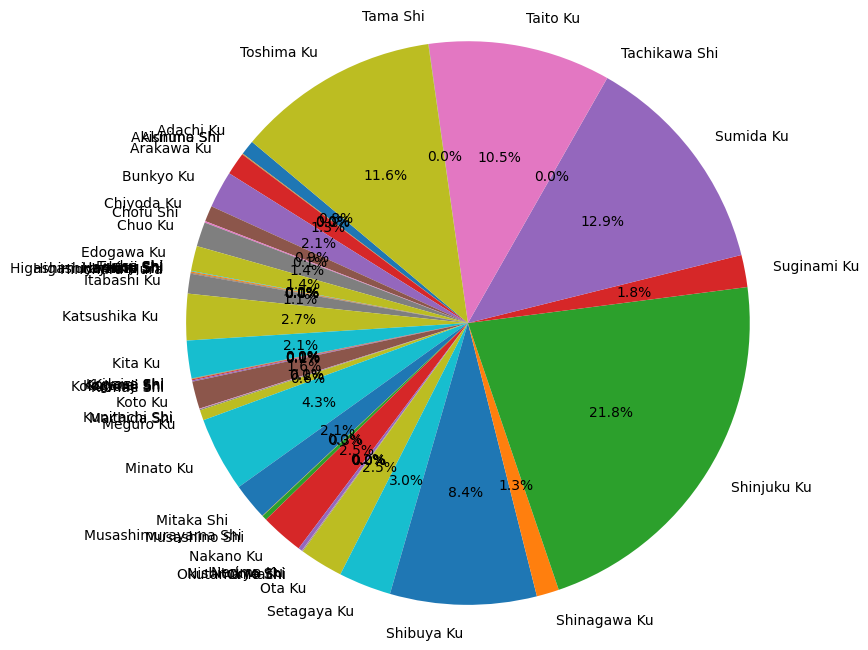

In [36]:
import matplotlib.pyplot as plt
dec_revenues_90 = dec.groupby('neighbourhood_cleansed').agg({'revenue_90':'sum'})
plt.figure(figsize=(8, 8))
plt.pie(dec_revenues_90['revenue_90'], labels=dec_revenues_90.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()


In [37]:
dec_revenues_90.sort_values(by='revenue_90',ascending=False)

,revenue_90
neighbourhood_cleansed,
Shinjuku Ku,5.879869e+09
Sumida Ku,3.473339e+09
Toshima Ku,3.137262e+09
Taito Ku,2.818436e+09
Shibuya Ku,2.263395e+09
Minato Ku,1.153988e+09
Setagaya Ku,8.122837e+08
Katsushika Ku,7.165420e+08
Ota Ku,6.702172e+08


In [38]:
jun['occupancy_rate_90'] = jun['availability_90'].apply(lambda x: round((90-x)/90*100))

In [39]:
jun['revenue_90'] = jun['price'] * (90-jun['availability_90'])

In [40]:
jun_30 = jun[jun['minimum_nights']>=30]

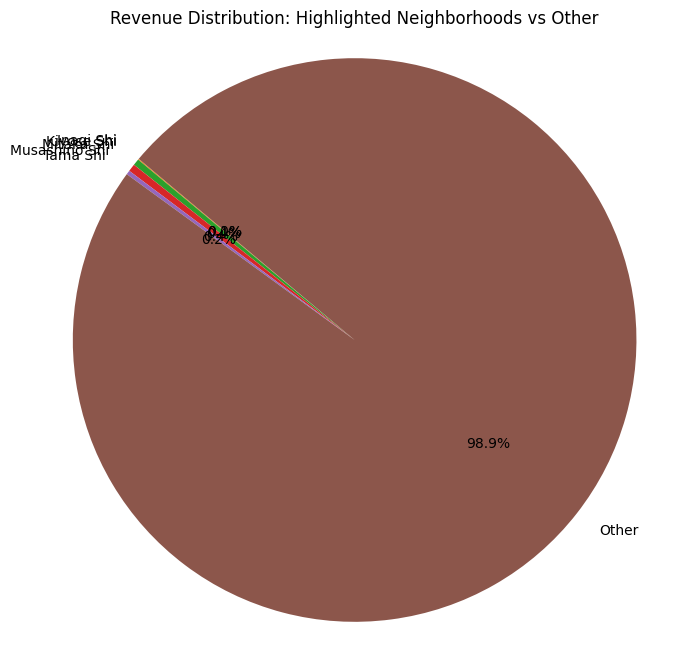

In [41]:
import matplotlib.pyplot as plt

# Group and aggregate revenue
jun_revenues_90 = jun_30.groupby('neighbourhood_cleansed').agg({'revenue_90':'sum'})

# Define highlighted neighborhoods
highlight_neighborhoods = ['Kiyose Shi', 'Mitaka Shi', 'Tama Shi', 'Musashino Shi', 'Inagi Shi']

# Separate highlighted and other
highlighted = jun_revenues_90.loc[jun_revenues_90.index.intersection(highlight_neighborhoods)]
other_total = jun_revenues_90.loc[~jun_revenues_90.index.isin(highlight_neighborhoods)]['revenue_90'].sum()

# Combine into one DataFrame
combined = highlighted.copy()
combined.loc['Other'] = other_total

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    combined['revenue_90'],
    labels=combined.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Revenue Distribution: Highlighted Neighborhoods vs Other')
plt.axis('equal')
plt.show()


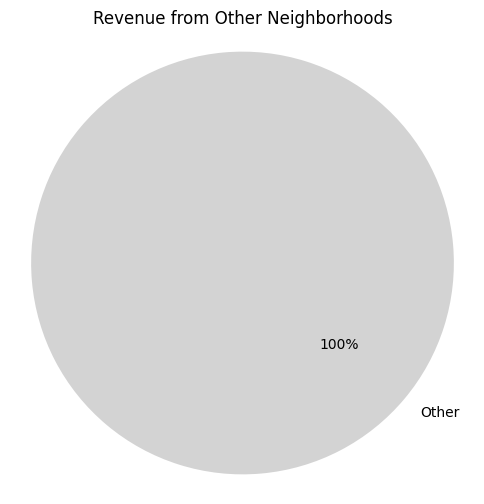

In [42]:
import matplotlib.pyplot as plt

# Group and aggregate revenue
jun_revenues_90 = jun_30.groupby('neighbourhood_cleansed').agg({'revenue_90':'sum'})

# Define highlighted neighborhoods
highlight_neighborhoods = ['Kiyose Shi', 'Mitaka Shi', 'Tama Shi', 'Musashino Shi', 'Inagi Shi']

# Calculate total revenue for other neighborhoods
other_total = jun_revenues_90.loc[~jun_revenues_90.index.isin(highlight_neighborhoods)]['revenue_90'].sum()

# Create a DataFrame with only the "Other" sector
other_df = pd.DataFrame({'revenue_90': [other_total]}, index=['Other'])

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    other_df['revenue_90'],
    labels=other_df.index,
    autopct='%1.0f%%',
    colors=['lightgrey'],
    startangle=140
)
plt.title('Revenue from Other Neighborhoods')
plt.axis('equal')
plt.show()


In [43]:
dec.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_3

# > 30% distribution in >=30 nights listings

In [44]:
highlight_neighborhoods = ['Kiyose Shi', 'Mitaka Shi', 'Tama Shi', 'Musashino Shi', 'Inagi Shi']

In [45]:
jun.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_3

In [ ]:
jun_7 = jun[jun['minimum_nights']<7]
jun_30 = jun[jun['minimum_nights']>=30]
mar_7 = mar[mar['minimum_nights']<7]
mar_30 = mar[mar['minimum_nights']>=30]
dec_7 = dec[dec['minimum_nights']<7]
dec_30 = dec[dec['minimum_nights']>=30]

In [ ]:
jun_7['occupancy_rate_60'] = jun_7['availability_60'].apply(lambda x: round((60-x)/60*100))
jun_7['occupancy_rate_90'] = jun_7['availability_90'].apply(lambda x: round((90-x)/90*100))
jun_30['occupancy_rate_60'] = jun_30['availability_60'].apply(lambda x: round((60-x)/60*100))
jun_30['occupancy_rate_90'] = jun_30['availability_90'].apply(lambda x: round((90-x)/90*100))

mar_7['occupancy_rate_60'] = mar_7['availability_60'].apply(lambda x: round((60-x)/60*100))
mar_7['occupancy_rate_90'] = mar_7['availability_90'].apply(lambda x: round((90-x)/90*100))
mar_30['occupancy_rate_60'] = mar_30['availability_60'].apply(lambda x: round((60-x)/60*100))
mar_30['occupancy_rate_90'] = mar_30['availability_90'].apply(lambda x: round((90-x)/90*100))

dec_7['occupancy_rate_60'] = dec_7['availability_60'].apply(lambda x: round((60-x)/60*100))
dec_7['occupancy_rate_90'] = dec_7['availability_90'].apply(lambda x: round((90-x)/90*100))
dec_30['occupancy_rate_60'] = dec_30['availability_60'].apply(lambda x: round((60-x)/60*100))
dec_30['occupancy_rate_90'] = dec_30['availability_90'].apply(lambda x: round((90-x)/90*100))

## Occupancy Rate in highlighted neighborhood

In [ ]:
jun_30['occupancy_rate_90'].mean()

np.float64(43.09035117627003)

In [58]:
subset = jun_30[jun_30['neighbourhood_cleansed'].isin(highlight_neighborhoods)]
subset.groupby('neighbourhood_cleansed').agg(occupancy_rate=('occupancy_rate_90','mean'))

,occupancy_rate
neighbourhood_cleansed,
Inagi Shi,10.000000
Kiyose Shi,36.250000
Mitaka Shi,66.538462
Musashino Shi,47.636364
Tama Shi,86.500000


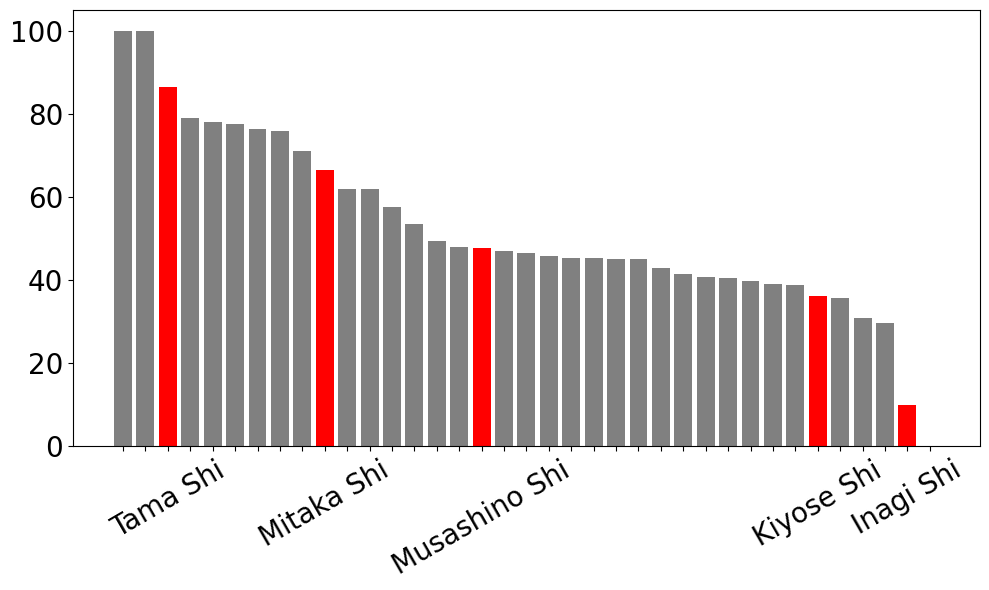

In [69]:
import matplotlib.pyplot as plt

# Group and sort the data
grouped = jun_30.groupby('neighbourhood_cleansed')['occupancy_rate_90'].mean().sort_values(ascending=False)

# Set colors: highlight 'Tama Shi' in red, others in gray
colors = ['red' if name in highlight_neighborhoods else 'gray' for name in grouped.index]

# Create labels: only show 'Tama Shi', others are blank
labels = [name if name in highlight_neighborhoods  else '' for name in grouped.index]


# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped.index, grouped.values, color=colors)
plt.xticks(ticks=range(len(grouped.index)), labels=labels, fontsize=20,rotation=30)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()


In [56]:
jun_30.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_3

## Accommodates

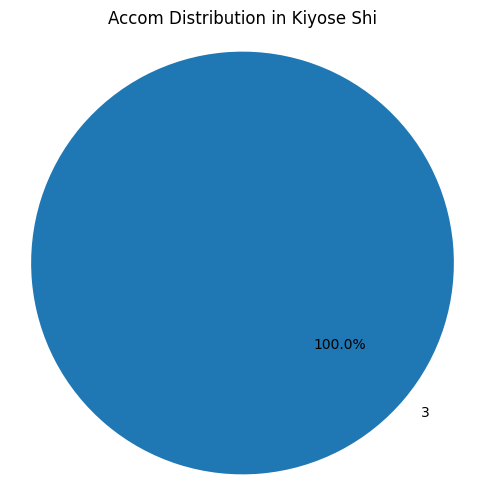

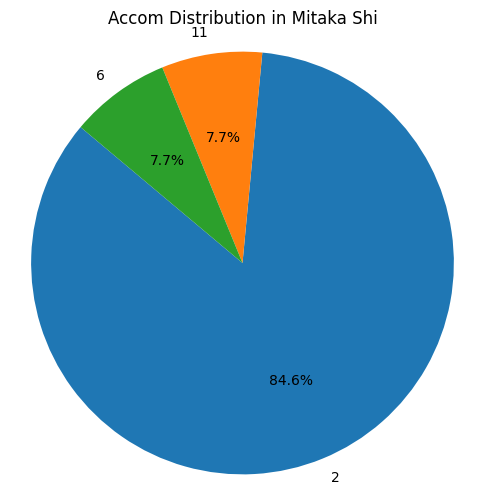

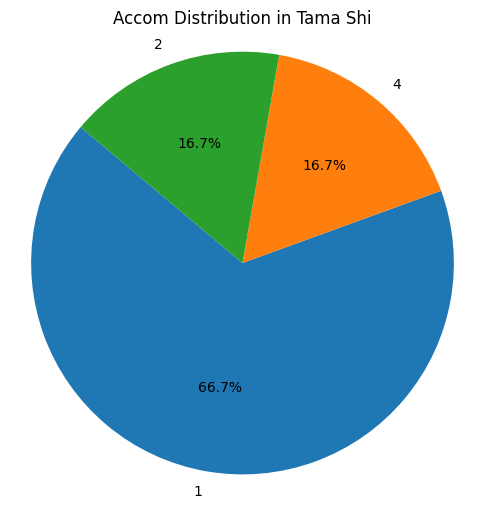

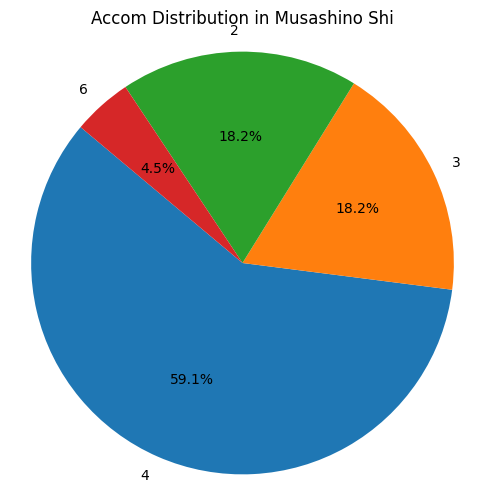

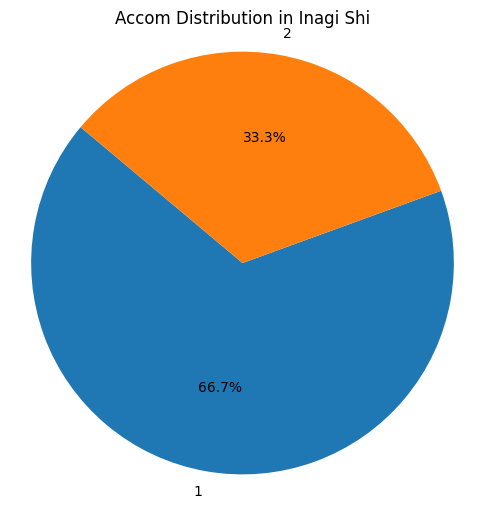

In [ ]:
# for neigh in highlight_neighborhoods:
# # Loop through each location

#     # Filter data for the current location
#     subset = jun_30[jun_30['neighbourhood_cleansed'] == neigh]
    
#     # Count minimum nights
#     accom_counts = subset['accommodates'].value_counts()
    
#     # Plot pie chart
#     plt.figure(figsize=(6, 6))
#     plt.pie(
#         accom_counts,
#         labels=accom_counts.index,
#         autopct='%1.1f%%',
#         startangle=140
#     )
#     plt.title(f'Accom Distribution in {neigh}')
#     plt.axis('equal')
#     plt.show()

In [48]:
jun_30 = jun[jun['minimum_nights']>=30]

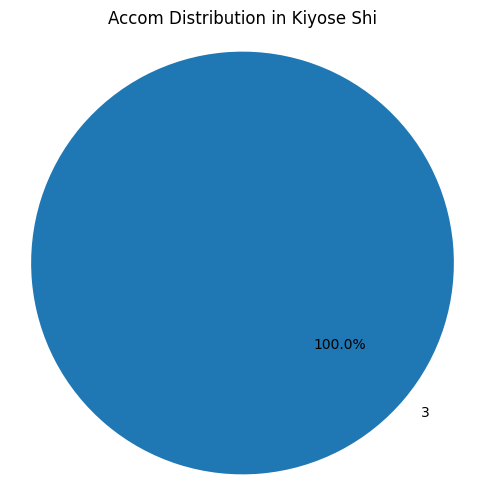

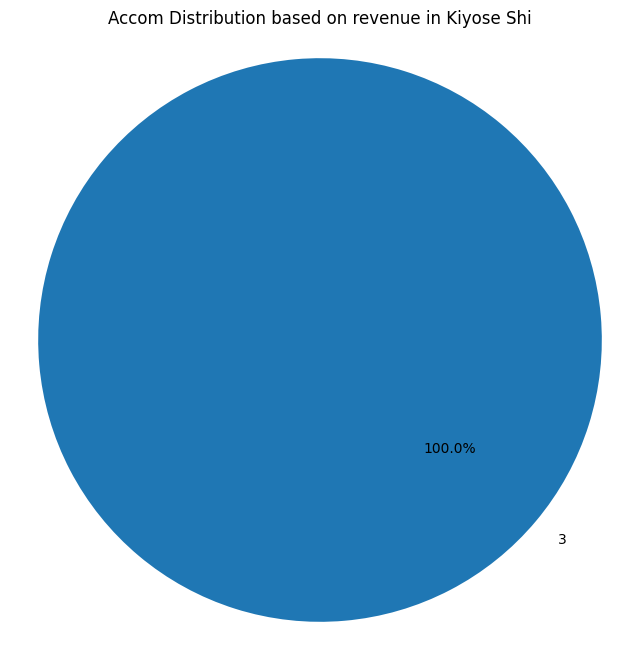

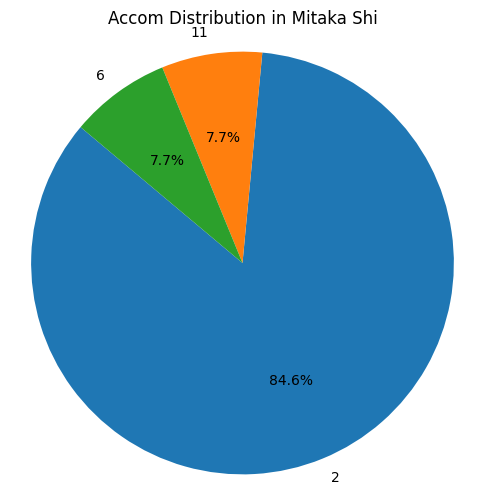

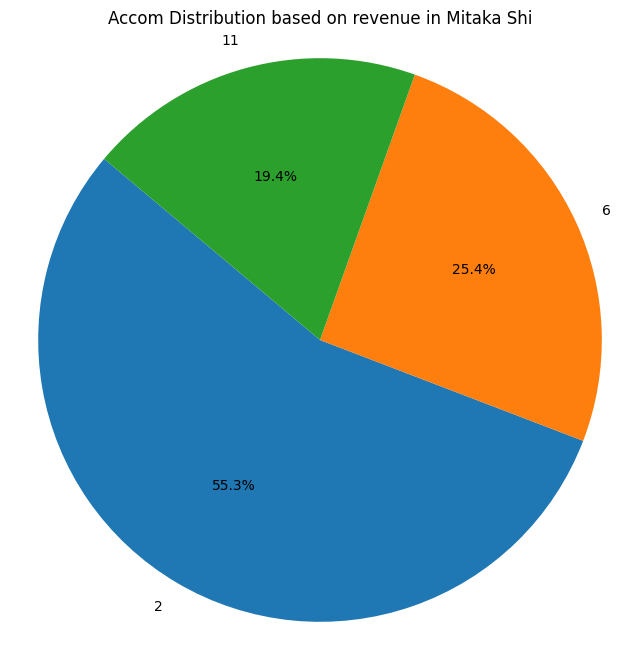

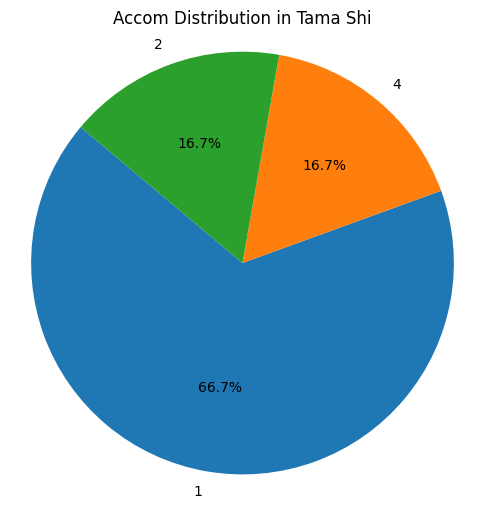

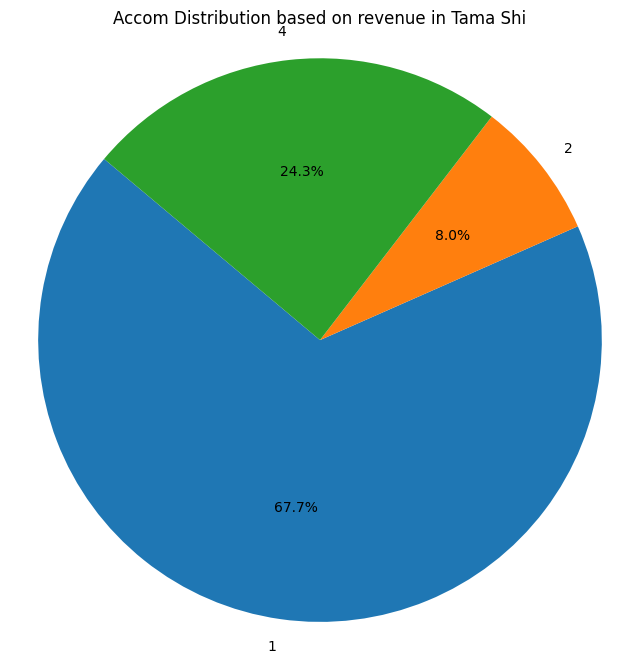

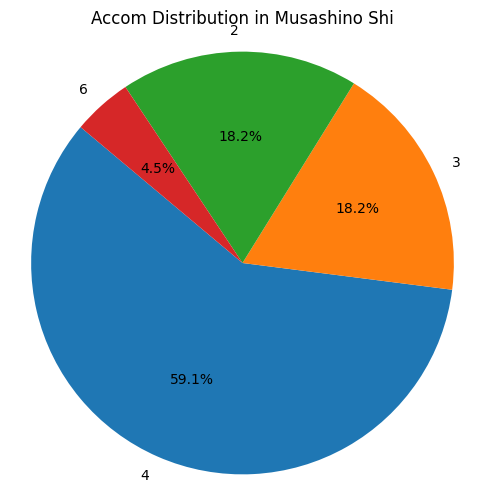

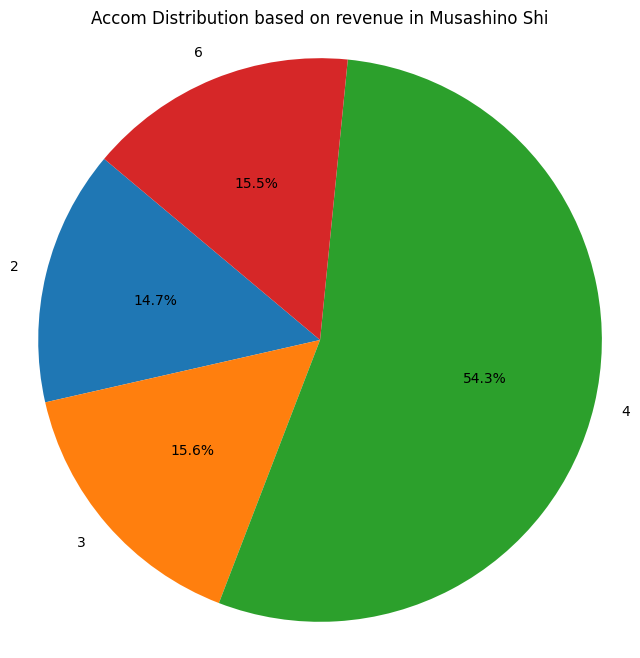

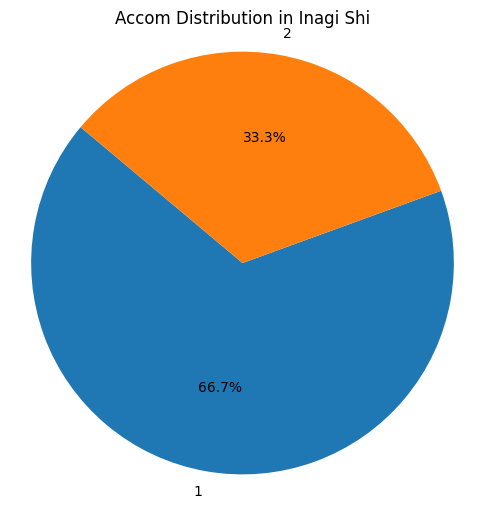

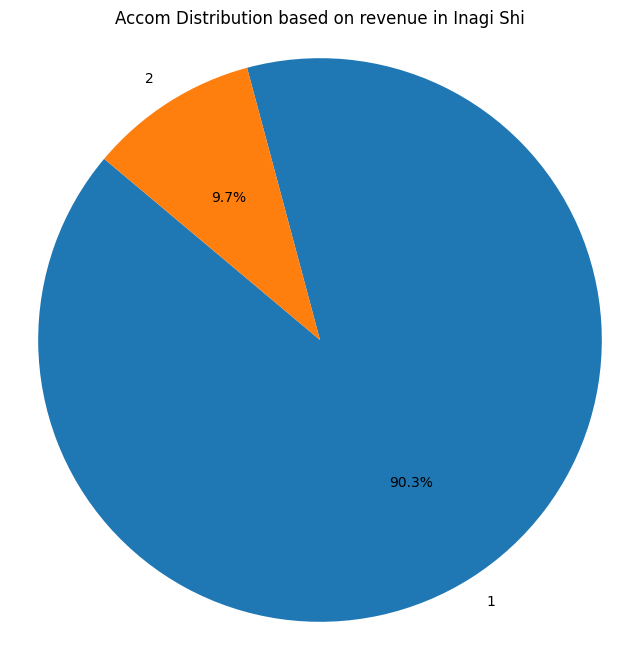

In [49]:

import matplotlib.pyplot as plt
for neigh in highlight_neighborhoods:

    # Filter data for the current location
    subset = jun_30[jun_30['neighbourhood_cleansed'] == neigh]
    
    # Count minimum nights
    accom_counts = subset['accommodates'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        accom_counts,
        labels=accom_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Accom Distribution in {neigh}')
    plt.axis('equal')
    plt.show()
    
    jun_30_acco_revenue = jun_30[jun_30['neighbourhood_cleansed']==neigh].groupby('accommodates').agg(revenue=('revenue_90','sum'))
    plt.figure(figsize=(8, 8))
    plt.pie(jun_30_acco_revenue['revenue'], labels=jun_30_acco_revenue.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Accom Distribution based on revenue in {neigh}')
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()


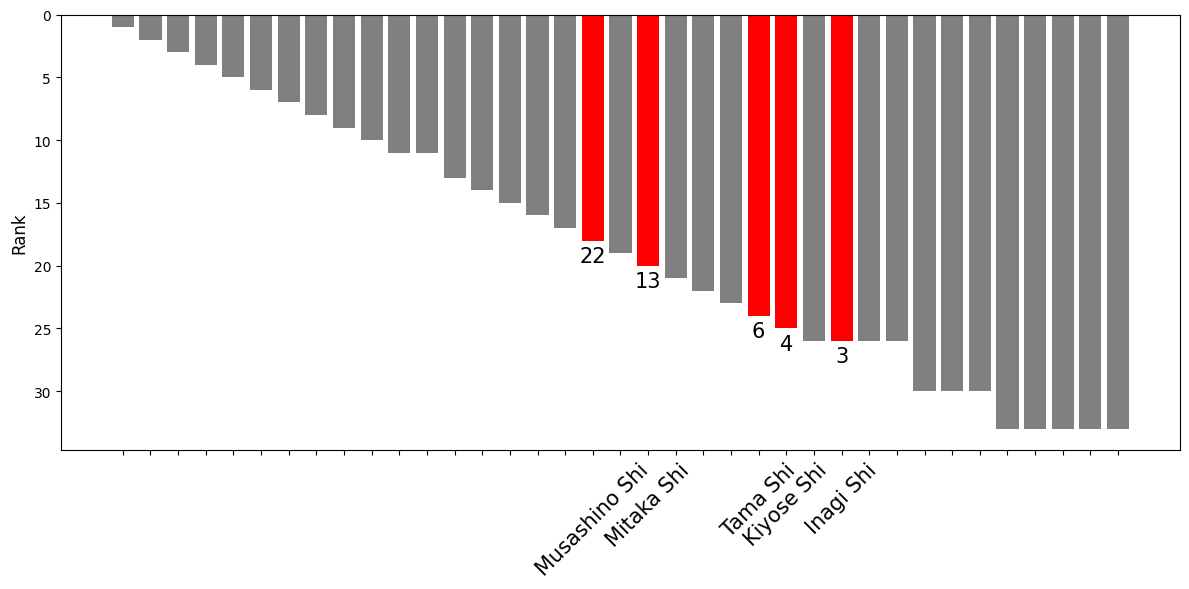

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your Airbnb dataset
# Generate ranked_series
ranked_series = jun_30['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).rank(ascending=False, method='min')

# Create a DataFrame for plotting and export
plot_df = pd.DataFrame({
    'Neighbourhood': ranked_series.index,
    'Rank': ranked_series.values,
})

# Sort by rank for consistent visualization
plot_df = plot_df.sort_values('Rank')

# Define neighborhoods to highlight
highlight_neighborhoods = ['Kiyose Shi', 'Mitaka Shi', 'Tama Shi', 'Musashino Shi', 'Inagi Shi']

# Create a color list: red for highlighted neighborhoods, grey for others
colors = ['red' if neigh in highlight_neighborhoods else 'grey' for neigh in plot_df['Neighbourhood']]

# Create x-axis labels: show names only for highlighted neighborhoods
xtick_labels = [neigh if neigh in highlight_neighborhoods else '' for neigh in plot_df['Neighbourhood']]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(plot_df['Neighbourhood'], plot_df['Rank'], color=colors)

for bar, neigh in zip(bars, plot_df['Neighbourhood']):
    if neigh in highlight_neighborhoods:
        count = jun_30['neighbourhood_cleansed'].value_counts()[neigh]  # Get actual count
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
                 f'{count}', ha='center', va='bottom', fontsize=15)

# Customize plot
plt.ylabel('Rank', fontsize=12)
plt.xticks(ticks=range(len(plot_df)), labels=xtick_labels,fontsize=15,rotation=45)
plt.gca().invert_yaxis()  # Invert y-axis so rank 1 is at the top
plt.tight_layout()
plt.show()

# # Add a column for Power BI to indicate highlighted neighborhoods
# plot_df['Highlight'] = plot_df['Neighbourhood'].isin(highlight_neighborhoods).astype(str)

# # Export data for Power BI
# plot_df.to_csv('neighbourhood_ranks_highlighted.csv', index=False)

## Number of Listings

In [51]:
jun_30['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)

neighbourhood_cleansed
Shinjuku Ku            659
Sumida Ku              565
Toshima Ku             333
Shibuya Ku             242
Setagaya Ku            220
Minato Ku              139
Ota Ku                 121
Kita Ku                 84
Adachi Ku               66
Suginami Ku             64
Bunkyo Ku               62
Taito Ku                62
Nakano Ku               57
Katsushika Ku           41
Edogawa Ku              38
Shinagawa Ku            37
Itabashi Ku             32
Musashino Shi           22
Koto Ku                 14
Mitaka Shi              13
Nerima Ku               11
Meguro Ku               10
Arakawa Ku               8
Tama Shi                 6
Kiyose Shi               4
Machida Shi              3
Inagi Shi                3
Komae Shi                3
Chuo Ku                  3
Chiyoda Ku               2
Hino Shi                 2
Fuchu Shi                2
Kodaira Shi              1
Ome Shi                  1
Chofu Shi                1
Higashimurayama Shi      1
Fussa

In [52]:
jun_30['neighbourhood_cleansed'].value_counts().mean()

np.float64(79.27027027027027)

In [53]:
ranked_series

neighbourhood_cleansed
Shinjuku Ku             1.0
Sumida Ku               2.0
Toshima Ku              3.0
Shibuya Ku              4.0
Setagaya Ku             5.0
Minato Ku               6.0
Ota Ku                  7.0
Kita Ku                 8.0
Adachi Ku               9.0
Suginami Ku            10.0
Bunkyo Ku              11.0
Taito Ku               11.0
Nakano Ku              13.0
Katsushika Ku          14.0
Edogawa Ku             15.0
Shinagawa Ku           16.0
Itabashi Ku            17.0
Musashino Shi          18.0
Koto Ku                19.0
Mitaka Shi             20.0
Nerima Ku              21.0
Meguro Ku              22.0
Arakawa Ku             23.0
Tama Shi               24.0
Kiyose Shi             25.0
Machida Shi            26.0
Inagi Shi              26.0
Komae Shi              26.0
Chuo Ku                26.0
Chiyoda Ku             30.0
Hino Shi               30.0
Fuchu Shi              30.0
Kodaira Shi            33.0
Ome Shi                33.0
Chofu Shi              33

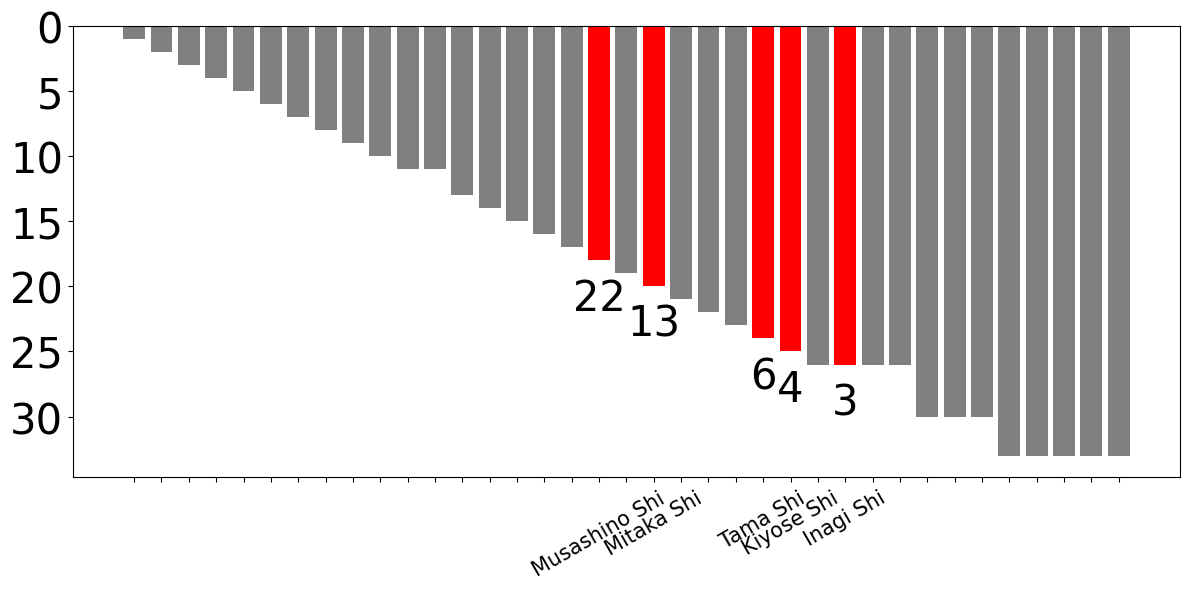

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your Airbnb dataset
# Generate ranked_series
ranked_series = jun_30['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).rank(ascending=False, method='min')

# Create a DataFrame for plotting and export
plot_df = pd.DataFrame({
    'Neighbourhood': ranked_series.index,
    'Rank': ranked_series.values,
})

# Sort by rank for consistent visualization
plot_df = plot_df.sort_values('Rank')

# Define neighborhoods to highlight
highlight_neighborhoods = ['Kiyose Shi', 'Mitaka Shi', 'Tama Shi', 'Musashino Shi', 'Inagi Shi']

# Create a color list: blue for highlighted neighborhoods, grey for others
colors = ['red' if neigh in highlight_neighborhoods else 'grey' for neigh in plot_df['Neighbourhood']]

# Create x-axis labels: show names only for highlighted neighborhoods
xtick_labels = [neigh if neigh in highlight_neighborhoods else '' for neigh in plot_df['Neighbourhood']]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(plot_df['Neighbourhood'], plot_df['Rank'], color=colors)

for bar, neigh in zip(bars, plot_df['Neighbourhood']):
    if neigh in highlight_neighborhoods:
        count = jun_30['neighbourhood_cleansed'].value_counts()[neigh]  # Get actual count
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 4.5,
                 f'{count}', ha='center', va='bottom', fontsize=30)

# Customize plot
plt.yticks(fontsize=30)
plt.xticks(ticks=range(len(plot_df)), labels=xtick_labels,fontsize=15,rotation=30)
plt.gca().invert_yaxis()  # Invert y-axis so rank 1 is at the top
plt.tight_layout()
plt.show()

# # Add a column for Power BI to indicate highlighted neighborhoods
# plot_df['Highlight'] = plot_df['Neighbourhood'].isin(highlight_neighborhoods).astype(str)

# # Export data for Power BI
# plot_df.to_csv('neighbourhood_ranks_highlighted.csv', index=False)

## Room Types

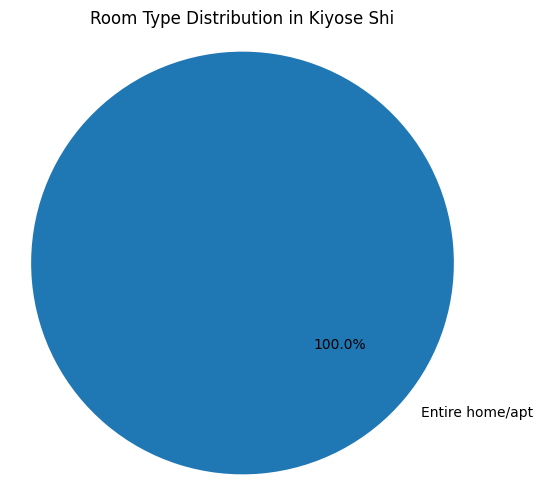

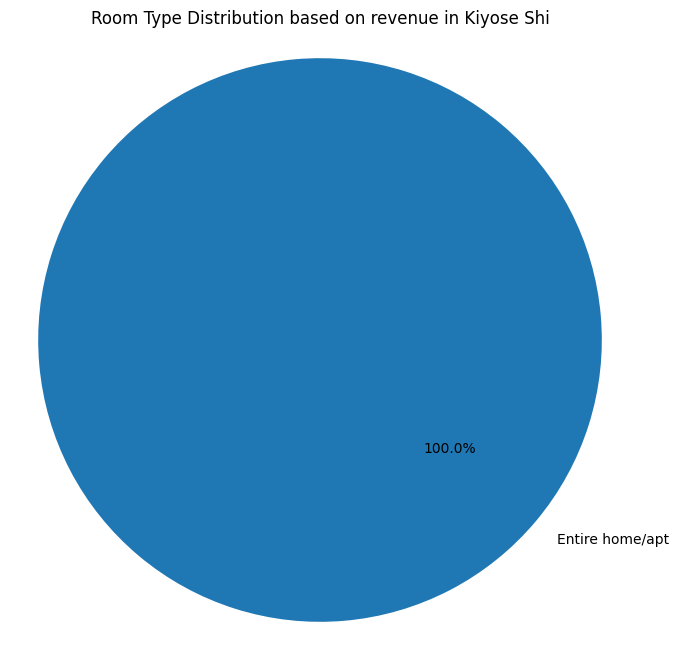

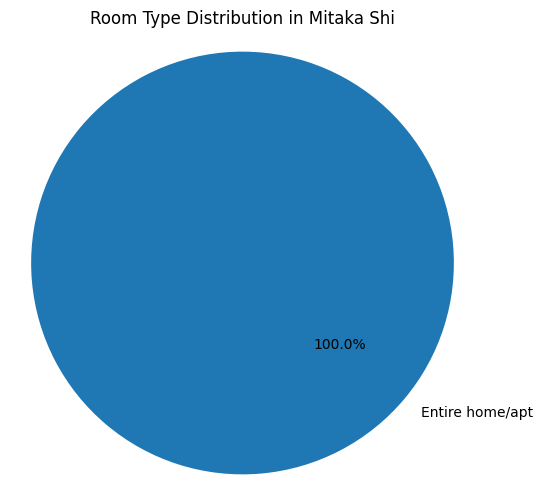

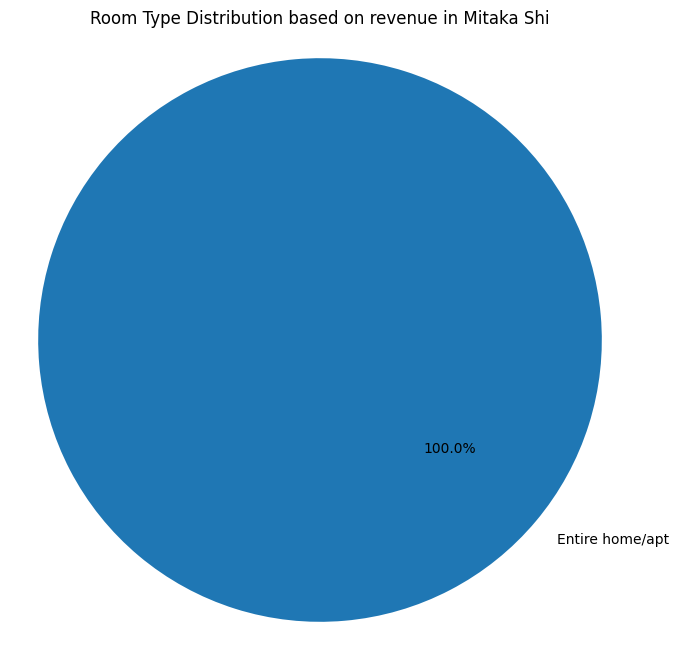

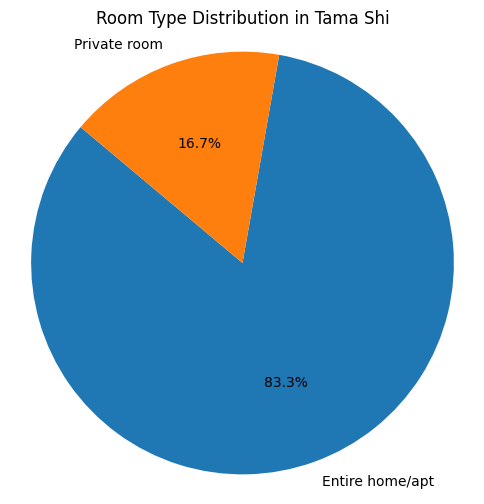

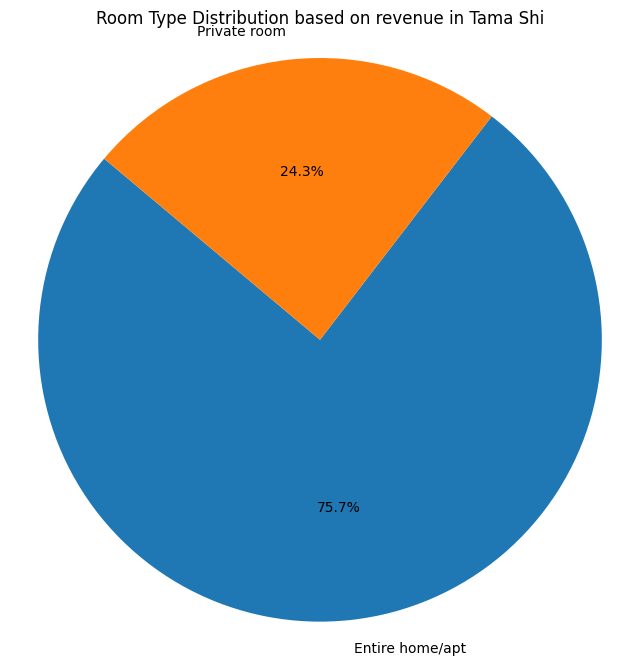

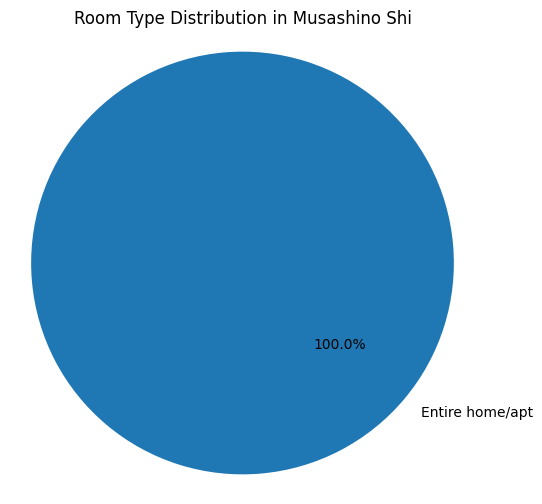

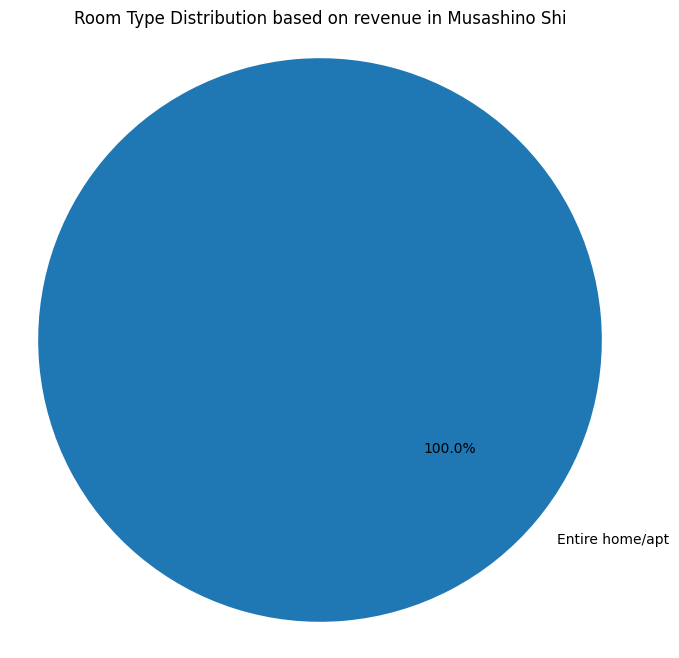

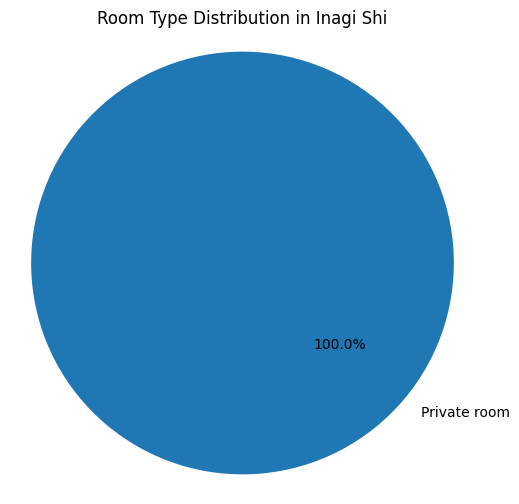

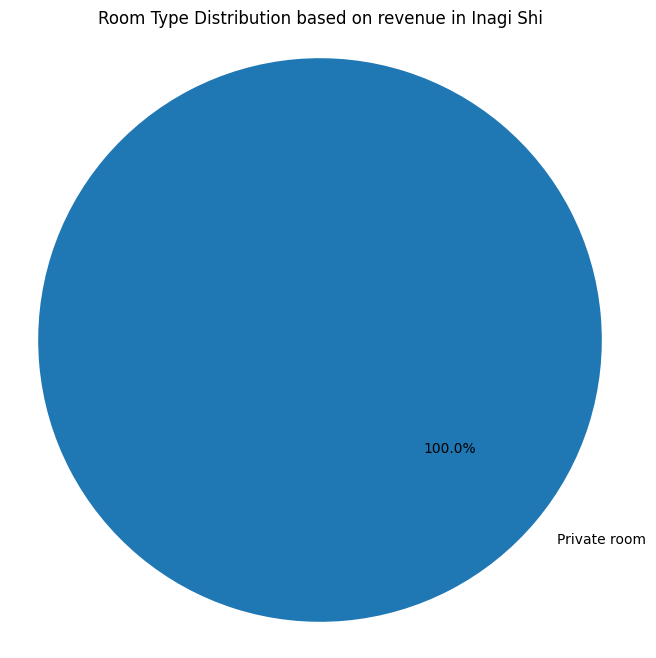

In [95]:

import matplotlib.pyplot as plt
for neigh in highlight_neighborhoods:

    # Filter data for the current location
    subset = jun_30[jun_30['neighbourhood_cleansed'] == neigh]
    
    # Count minimum nights
    accom_counts = subset['room_type'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        accom_counts,
        labels=accom_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Room Type Distribution in {neigh}')
    plt.axis('equal')
    plt.show()
    
    jun_30_acco_revenue = jun_30[jun_30['neighbourhood_cleansed']==neigh].groupby('room_type').agg(revenue=('revenue_90','sum'))
    plt.figure(figsize=(8, 8))
    plt.pie(jun_30_acco_revenue['revenue'], labels=jun_30_acco_revenue.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Room Type Distribution based on revenue in {neigh}')
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()


## Bedrooms

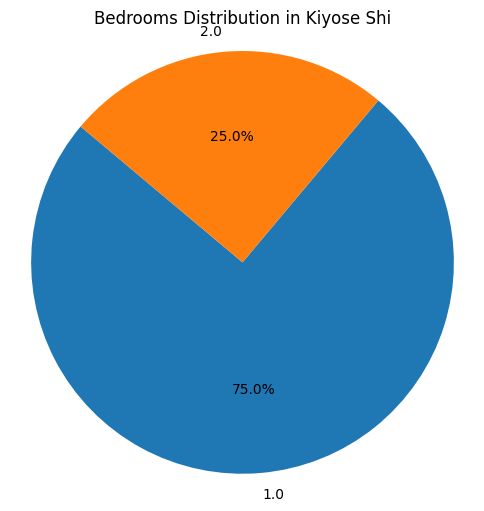

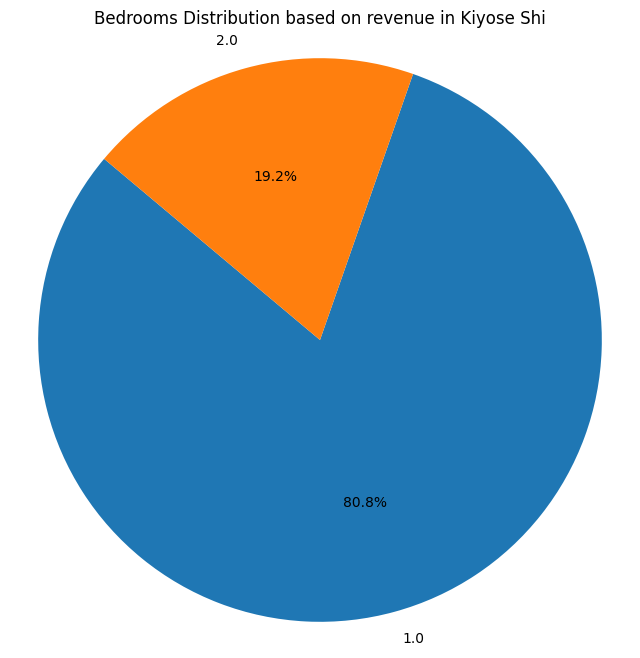

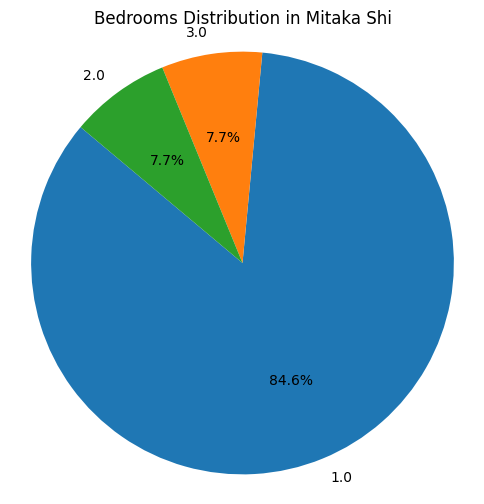

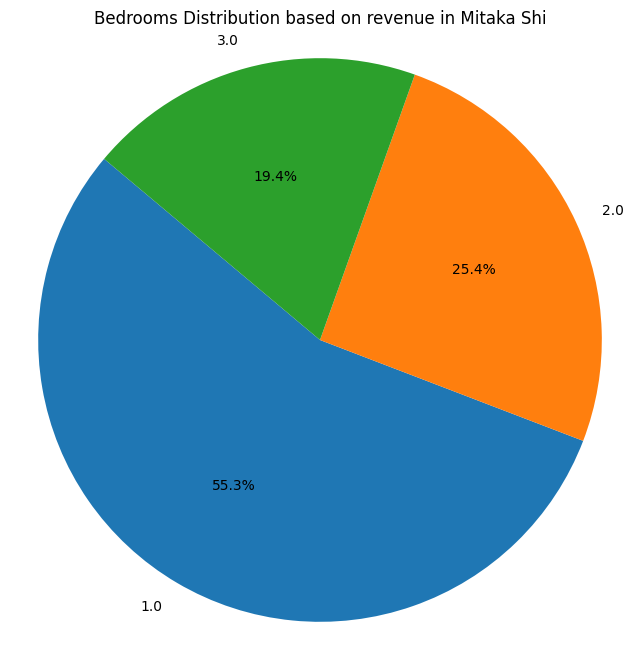

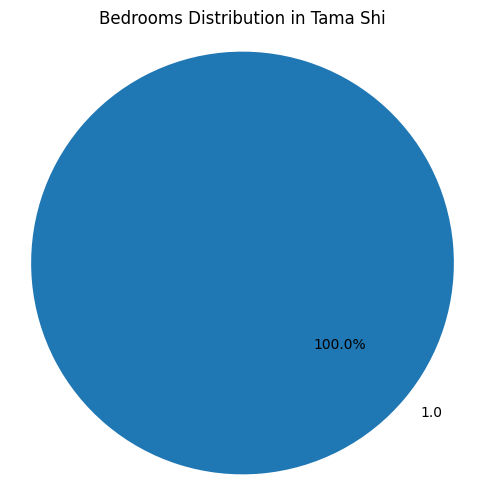

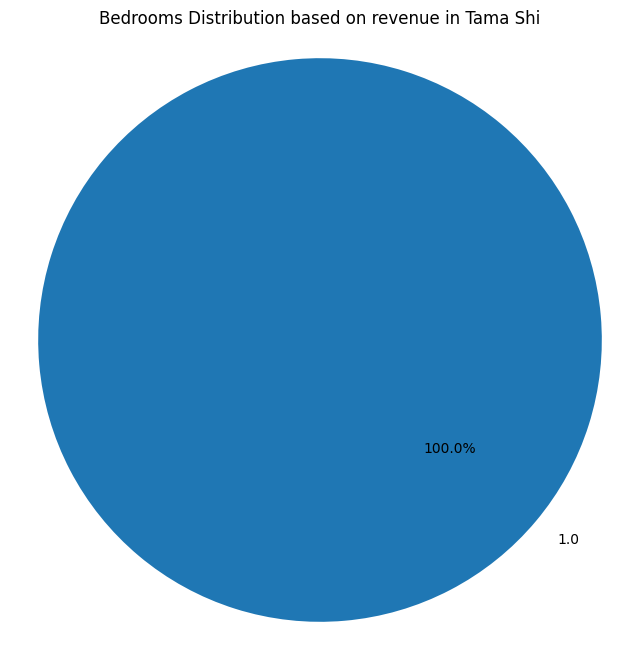

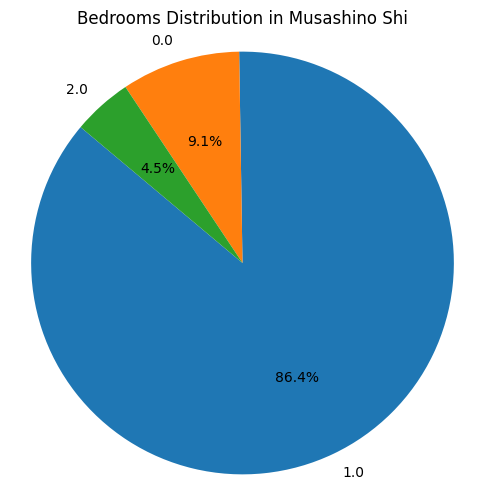

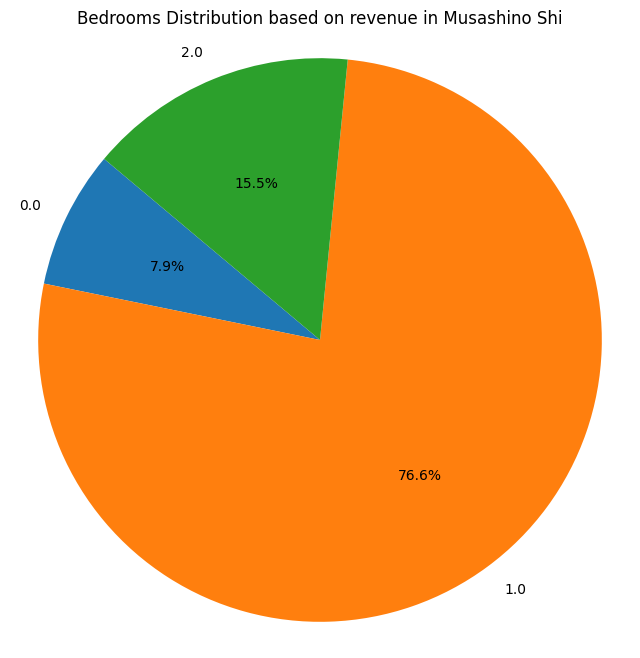

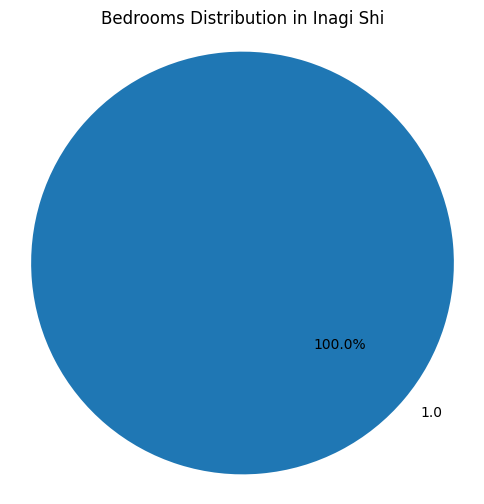

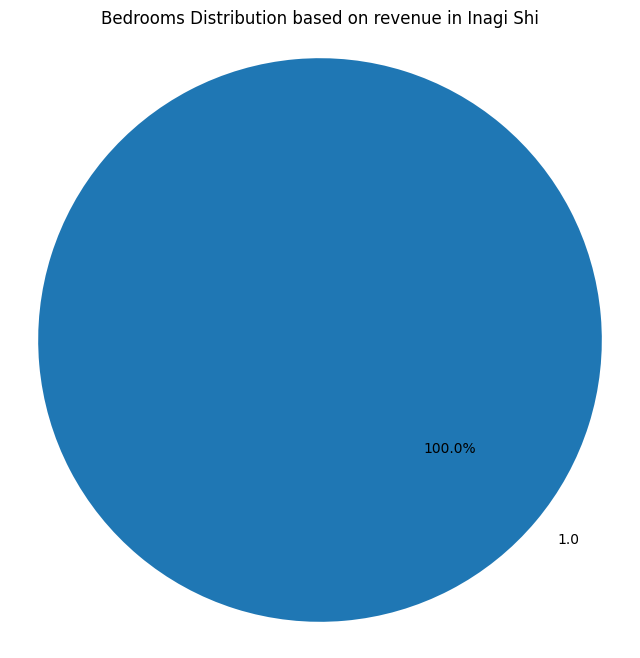

In [100]:

import matplotlib.pyplot as plt
for neigh in highlight_neighborhoods:

    # Filter data for the current location
    subset = jun_30[jun_30['neighbourhood_cleansed'] == neigh]
    
    # Count minimum nights
    accom_counts = subset['bedrooms'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        accom_counts,
        labels=accom_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Bedrooms Distribution in {neigh}')
    plt.axis('equal')
    plt.show()
    
    jun_30_acco_revenue = jun_30[jun_30['neighbourhood_cleansed']==neigh].groupby('bedrooms').agg(revenue=('revenue_90','sum'))
    plt.figure(figsize=(8, 8))
    plt.pie(jun_30_acco_revenue['revenue'], labels=jun_30_acco_revenue.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Bedrooms Distribution based on revenue in {neigh}')
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()


## Beds

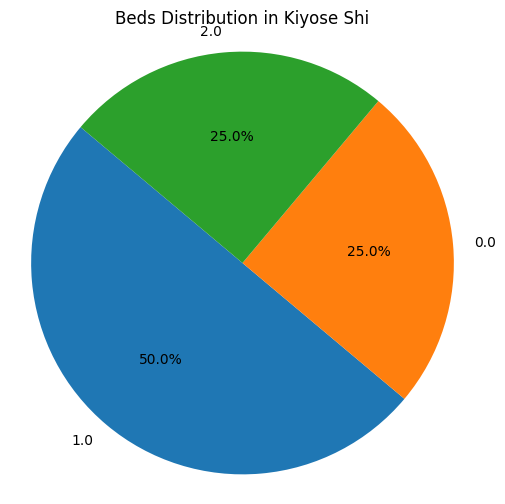

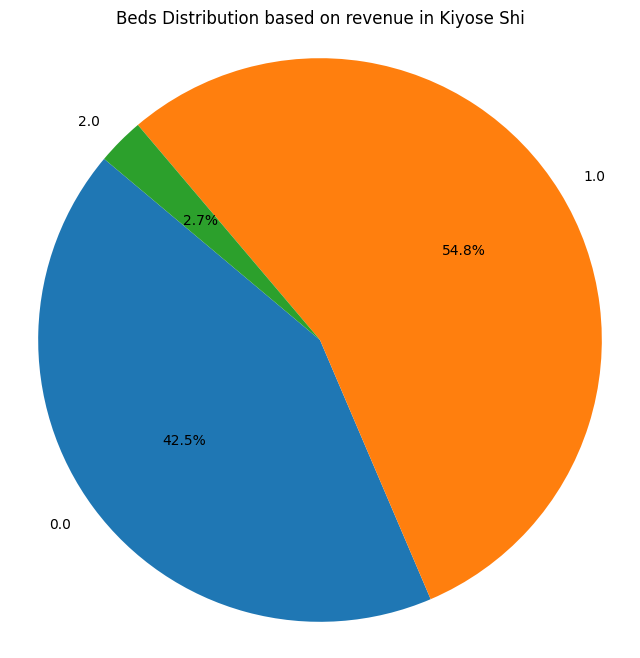

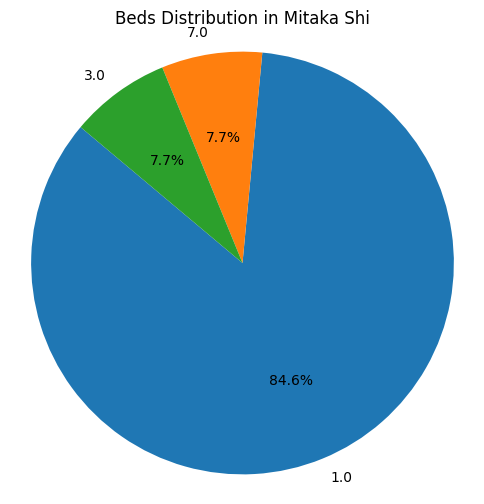

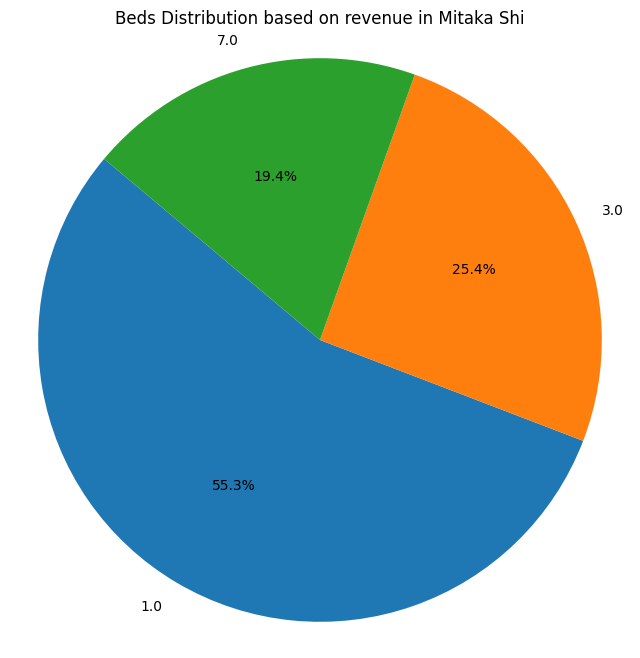

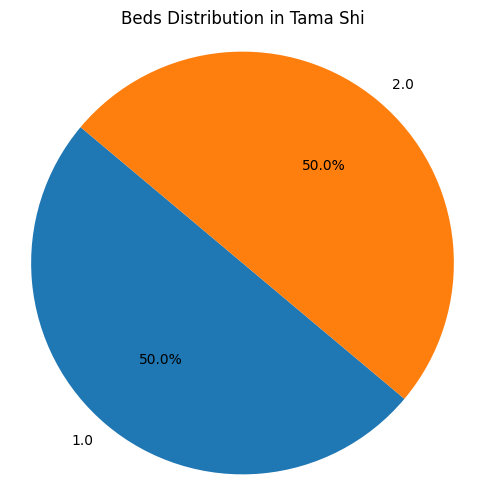

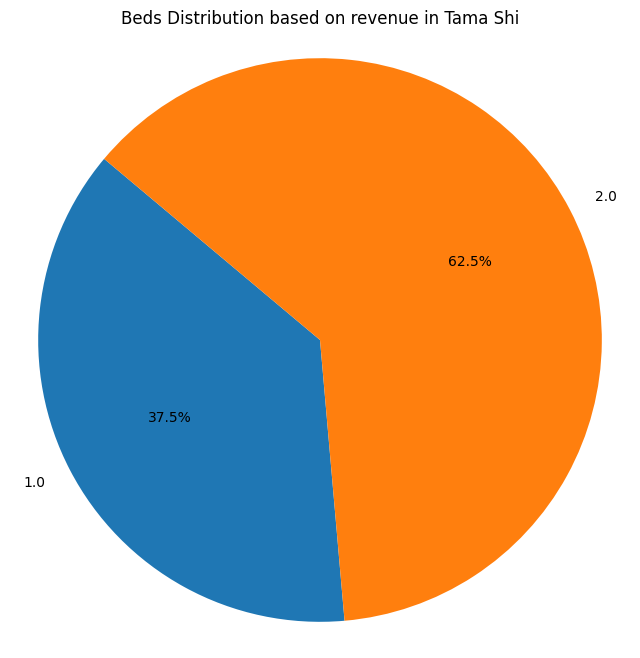

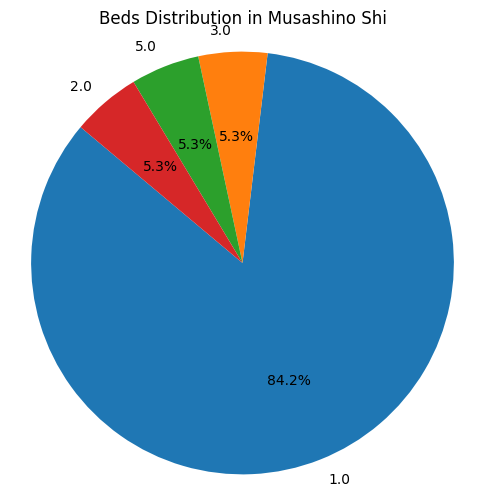

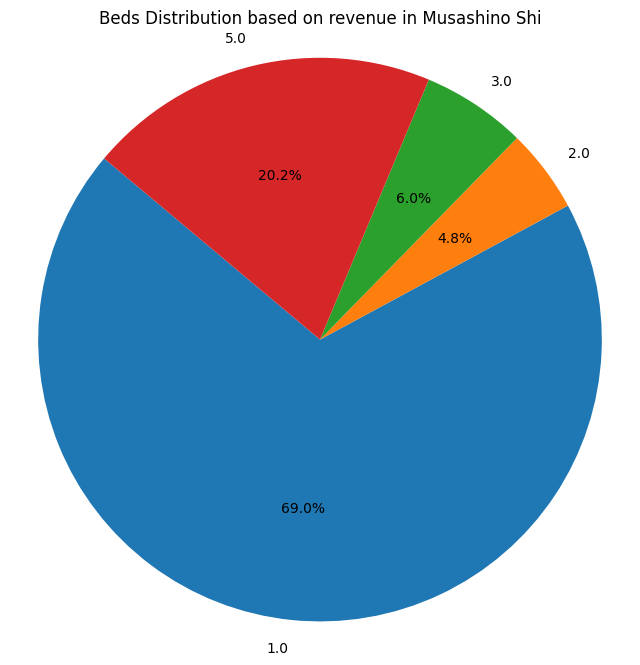

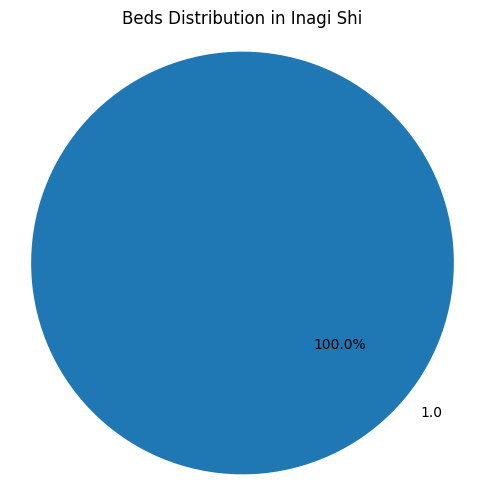

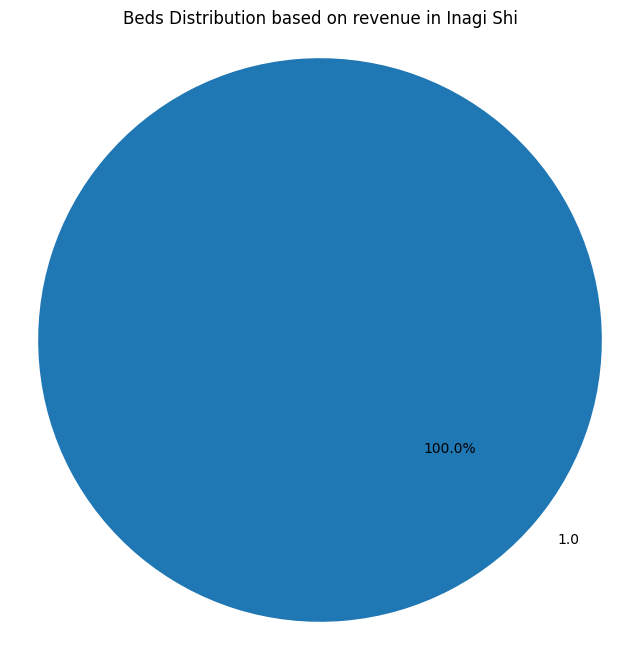

In [101]:

import matplotlib.pyplot as plt
for neigh in highlight_neighborhoods:

    # Filter data for the current location
    subset = jun_30[jun_30['neighbourhood_cleansed'] == neigh]
    
    # Count minimum nights
    accom_counts = subset['beds'].value_counts()
    
    # Plot pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(
        accom_counts,
        labels=accom_counts.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title(f'Beds Distribution in {neigh}')
    plt.axis('equal')
    plt.show()
    
    jun_30_acco_revenue = jun_30[jun_30['neighbourhood_cleansed']==neigh].groupby('beds').agg(revenue=('revenue_90','sum'))
    plt.figure(figsize=(8, 8))
    plt.pie(jun_30_acco_revenue['revenue'], labels=jun_30_acco_revenue.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Beds Distribution based on revenue in {neigh}')
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()


## Price

In [112]:
jun_30['price'].mean()

np.float64(25256.188544152745)

In [113]:
jun_30['price'].median()

np.float64(10029.0)

In [107]:
for neigh in highlight_neighborhoods:
    mean_price = jun_30[jun_30['neighbourhood_cleansed']==neigh]['price'].mean()
    median_price = jun_30[jun_30['neighbourhood_cleansed']==neigh]['price'].median()
    print(f'Mean Price of {neigh} is {mean_price}.')
    print(f'Median Price of {neigh} is {median_price}.')

Mean Price of Kiyose Shi is 8677.25.
Median Price of Kiyose Shi is 8712.0.
Mean Price of Mitaka Shi is 9936.538461538461.
Median Price of Mitaka Shi is 7050.0.
Mean Price of Tama Shi is 10860.666666666666.
Median Price of Tama Shi is 14000.0.
Mean Price of Musashino Shi is 10180.181818181818.
Median Price of Musashino Shi is 9779.0.
Mean Price of Inagi Shi is 4000.0.
Median Price of Inagi Shi is 2500.0.


In [114]:
jun.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_3